In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [173]:

inp_file = "starbucks.csv"
drinks_data,header = [],''
with open(inp_file, 'r') as inp:
    for line in inp:
        if line.strip():
            if not header:
                header = line.split(",")
            else :
                line_lst = line.strip('\n').split(",")
                drinks_data.append(line_lst)
#print(drinks_data[0:5])
print(len(header))

18


## alterantively we can use pandas for easily converting data in to DF

In [174]:
drinks_df = pd.read_csv(inp_file)

In [175]:
drinks_df.shape

(242, 18)

In [176]:
drinks_df.head()


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


# cleaning the data and handling missing values

In [177]:
drinks_df.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

## dropping the rows with empty values 

In [ ]:
drinks_df.dropna(inplace = True)

## getting the data types of the columns in drinks_data

In [179]:
drinks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          241 non-null    object 
 1   Beverage                   241 non-null    object 
 2   Beverage_prep              241 non-null    object 
 3   Calories                   241 non-null    int64  
 4    Total Fat (g)             241 non-null    object 
 5   Trans Fat (g)              241 non-null    float64
 6   Saturated Fat (g)          241 non-null    float64
 7    Sodium (mg)               241 non-null    int64  
 8    Total Carbohydrates (g)   241 non-null    int64  
 9   Cholesterol (mg)           241 non-null    int64  
 10   Dietary Fibre (g)         241 non-null    int64  
 11   Sugars (g)                241 non-null    int64  
 12   Protein (g)               241 non-null    float64
 13  Vitamin A (% DV)           241 non-null    object 
 14 

### few columns are have different datatypes such as string object , so i'll convert them to float by stripping the '%' symbol

In [ ]:
drinks_df.columns

### changing 'Vitamin A (% DV) ', 'Vitamin C (% DV)',' Calcium (% DV) ', 'Iron (% DV) ' columns to float data type

### the 'Caffeine (mg)' column has few rows with 'Varies' i replaced with mean values for those rows

In [181]:
colmns_tbc = [' Total Fat (g)','Vitamin A (% DV) ', 'Vitamin C (% DV)',' Calcium (% DV) ', 'Iron (% DV) ']
drinks_df[' Total Fat (g)'] = drinks_df[' Total Fat (g)'].str.replace(' ','.')
drinks_df['Caffeine (mg)'] = pd.to_numeric(drinks_df['Caffeine (mg)'],errors = 'coerce')
mean_caf = round(drinks_df['Caffeine (mg)'].mean(),2)
drinks_df.isna().sum()


Beverage_category             0
Beverage                      0
Beverage_prep                 0
Calories                      0
 Total Fat (g)                0
Trans Fat (g)                 0
Saturated Fat (g)             0
 Sodium (mg)                  0
 Total Carbohydrates (g)      0
Cholesterol (mg)              0
 Dietary Fibre (g)            0
 Sugars (g)                   0
 Protein (g)                  0
Vitamin A (% DV)              0
Vitamin C (% DV)              0
 Calcium (% DV)               0
Iron (% DV)                   0
Caffeine (mg)                22
dtype: int64

In [182]:
drinks_df['Caffeine (mg)'].fillna(mean_caf,inplace = True)

drinks_df[colmns_tbc] = drinks_df[colmns_tbc].apply(lambda x:x.str.strip("%")).astype(float)

mean_caf

89.52

### the final data  types of the Data frame Drinks_df

In [186]:
drinks_df.head()
drinks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          241 non-null    object 
 1   Beverage                   241 non-null    object 
 2   Beverage_prep              241 non-null    object 
 3   Calories                   241 non-null    int64  
 4    Total Fat (g)             241 non-null    float64
 5   Trans Fat (g)              241 non-null    float64
 6   Saturated Fat (g)          241 non-null    float64
 7    Sodium (mg)               241 non-null    int64  
 8    Total Carbohydrates (g)   241 non-null    int64  
 9   Cholesterol (mg)           241 non-null    int64  
 10   Dietary Fibre (g)         241 non-null    int64  
 11   Sugars (g)                241 non-null    int64  
 12   Protein (g)               241 non-null    float64
 13  Vitamin A (% DV)           241 non-null    float64
 14 

# ***EDA***



# ***Visualization 1***

## **this horizantal bar graph shows the number of beverages under each Beverage Category**


<Axes: ylabel='Beverage_category'>

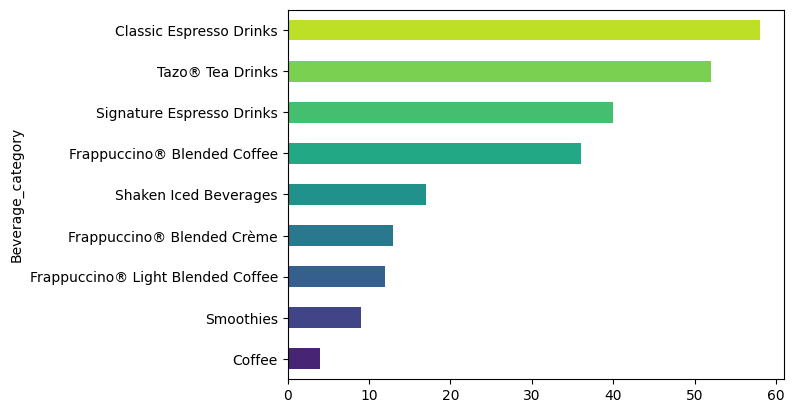

In [187]:
bev_counts =drinks_df['Beverage_category'].value_counts().sort_values(ascending=True)
custom_palette = sb.color_palette("viridis", len(bev_counts))
bev_counts.plot(kind = "barh",color =custom_palette )


# ***Visualization 2***

## **Average sugar in a Starbucks Beverage**

the average sugar  in grams in a starbucks beverage is 33.02


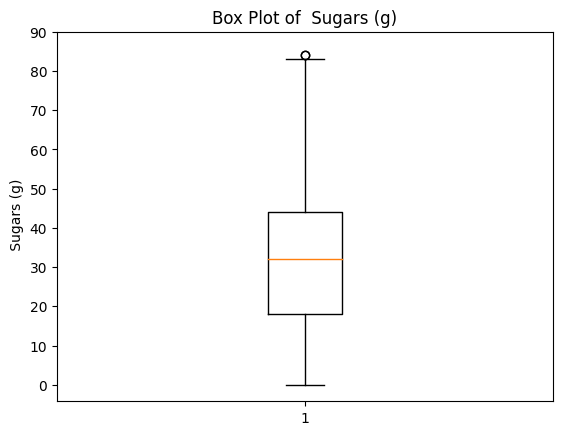

In [166]:
col_name = " Sugars (g)"

avg_sugar_val  = round(drinks_df[col_name].mean(),2)
avg_sugar_val

print(f"the average sugar  in grams in a starbucks beverage is {avg_sugar_val}")

#box plot 
plt.boxplot(drinks_df[col_name])

plt.ylabel(col_name)
plt.title(f'Box Plot of {col_name}')
plt.yticks(range(0, int(drinks_df[col_name].max()) + 10, 10))
plt.show()

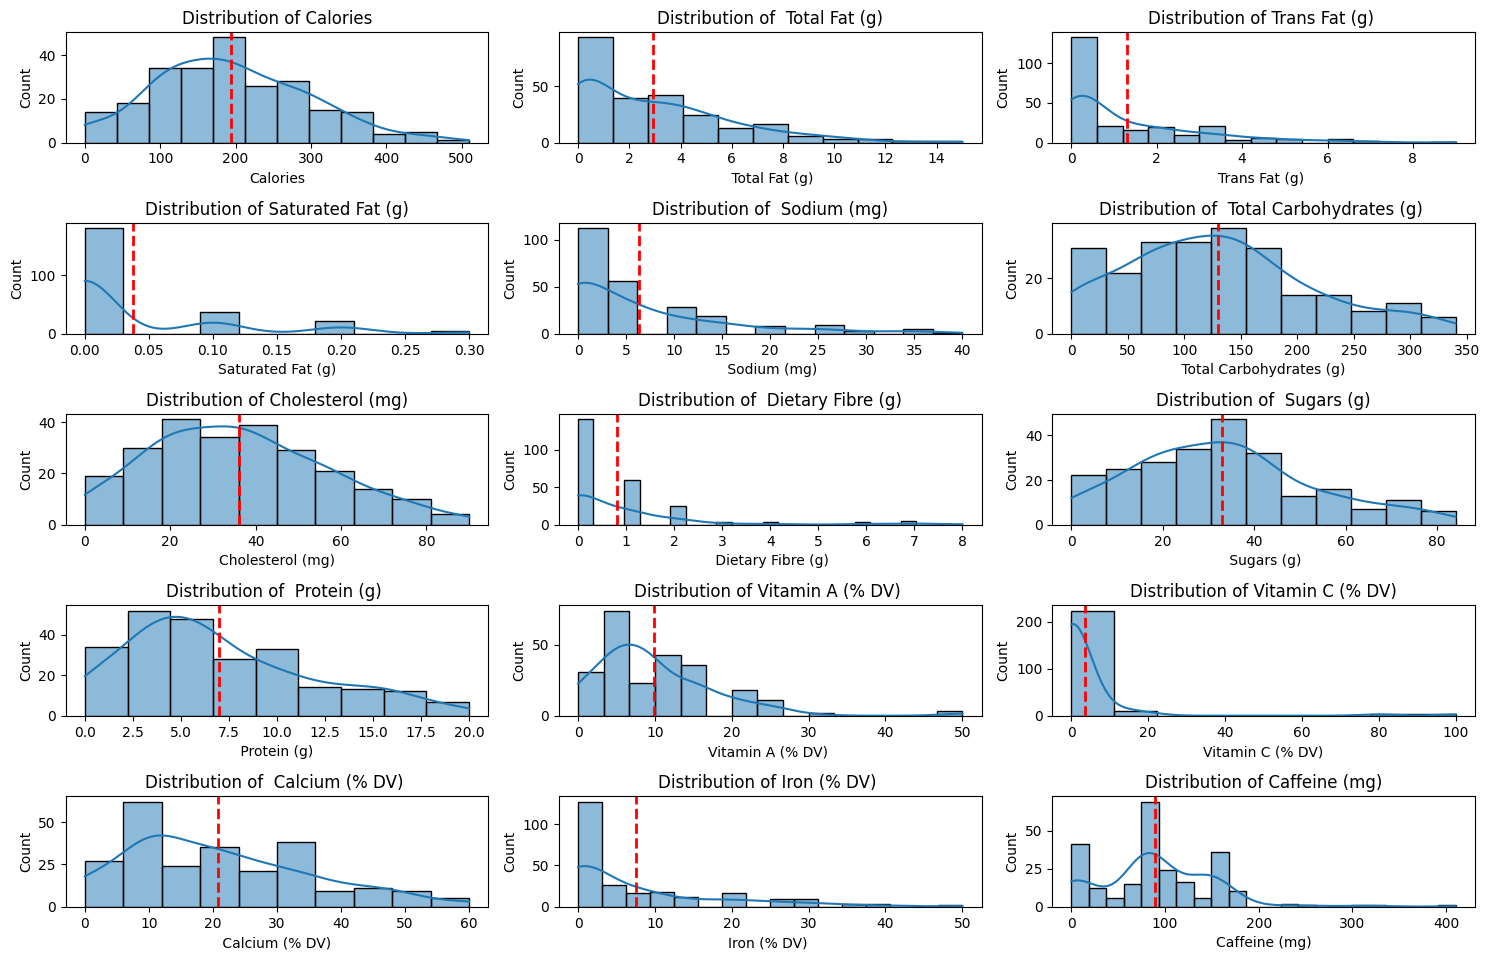

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175.0
1,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260.0
2,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,330.0
3,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410.0
4,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10.0,0.0,20.0,0.0,75.0


In [151]:
plt.figure(figsize=(15, 15))

included_columns = ['Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
                    ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
                    ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
                    ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)']

df_subset = drinks_df[included_columns]
df_subset.head()
for i, column in enumerate(df_subset.columns, 1):
    plt.subplot(8, 3, i)
    sb.histplot(df_subset[column], kde=True)
    
    mean_value = df_subset[column].mean()
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()
df_subset.head()